# Simulation Problem 8
## Machine Learning HW3

#### Loading Dataset

In [1]:
from load_pics import loadData
import numpy as np

X, Y = loadData()


#### Fitting GMM with Different K

In [3]:
from sklearn.mixture import GaussianMixture

class GMM:
    def __init__(self, n_class, n_feature, k):
        self.n_class = n_class
        self.n_feature = n_feature
        self.k = k
        #self.model = list([GaussianMixture(n_components=k, random_state=1)] * n_class)
        self.model = list("")
        for i in range (self.n_class):
            self.model.append(GaussianMixture(n_components=k, random_state=1))
        pass

    def update(self, x, y):
        samples = list("")
        for i in range(self.n_class):
            samples.append(np.array(x[y == i]))
        aic = 0
        bic = 0
        for i in range(self.n_class):
            self.model[i].fit(samples[i], np.array([i] * samples[i].shape[0]))
            aic += self.model[i].aic(samples[i])
            bic += self.model[i].bic(samples[i])
        return aic, bic

    def predict(self, x):
        likelihood = list("")
        for i in range(self.n_class):
            likelihood.append(self.model[i].score_samples(x))
        likelihood = np.array(likelihood).T
        print(likelihood)
        return np.argmax(likelihood,axis=1)

In [5]:
AIC = list("")
BIC = list("")

for i in range(2,10):
    classifier = GMM(2, 2, k=i)
    aic, bic = classifier.update(X, Y)
    AIC.append(aic)
    BIC.append(bic)

#### AIC/BIC

Text(0.5, 1.0, 'Bayesian Information Criterion')

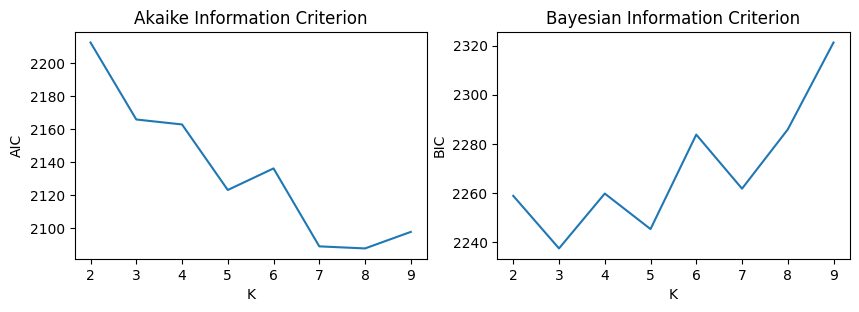

In [6]:
import matplotlib.pyplot as plt
import numpy as np

manu = np.array(X[Y == 1])
chf = np.array(X[Y == 0])

fig, ax = plt.subplots(1,2)
fig.set_dpi(100)
fig.set_size_inches(10, 3)

ax[0].plot(range(2,10),AIC)
ax[0].set_xlabel("K")
ax[0].set_title("Akaike Information Criterion")
ax[0].set_ylabel("AIC")

ax[1].plot(range(2,10),BIC)
ax[1].set_xlabel("K")
ax[1].set_ylabel("BIC")
ax[1].set_title("Bayesian Information Criterion")

#### Best GMM Model

Most Efficient k:  3


/home/kassra/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: No contour levels were found within the data range.


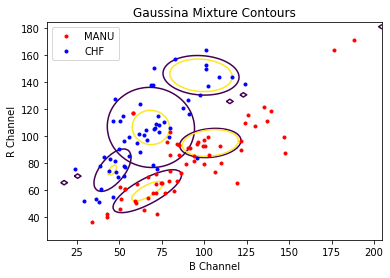

In [15]:
from scipy.stats import multivariate_normal

k = np.argmin(np.array(BIC)) + 2
classifier = GMM(2,2,k)
classifier.update(X,Y)
print("Most Efficient k: ", k)

mu = np.array([classifier.model[0].means_, classifier.model[1].means_])
cov = np.array([classifier.model[0].covariances_, classifier.model[1].covariances_])

deltaX = (max(X[:,0]) - min(X[:,0]))/10
deltaY = (max(X[:,1]) - min(X[:,1]))/10
xmin = min(X[:,0]) - deltaX
xmax = max(X[:,0]) + deltaX
ymin = min(X[:,1]) - deltaY
ymax = max(X[:,1]) + deltaY
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

for i in range(mu.shape[0]):
    for j in range(mu.shape[1]):
        target = multivariate_normal(mean=mu[i,j], cov=cov[i,j])
        xy = target.rvs()
        xy2 = target.rvs() 
        zz = target.pdf(np.dstack((xx, yy)))
        plt.contour(xx,yy, zz, levels=np.sort([target.pdf(xy), target.pdf(xy2)]))

plt.plot(manu[:,0], manu[:,1], '.r', label='MANU')
plt.plot(chf[:,0], chf[:,1], '.b', label='CHF')
plt.xlabel("B Channel")
plt.ylabel("R Channel")
plt.legend()
plt.title("Gaussina Mixture Contours")
plt.show()